<div style="width: 50%; float: left">
    <img src="../ups2.png" width="217" align="center">
    <br>
    <strong>CARRERA: </strong> Computación
    <br>
    <strong>EXAMEN: </strong>1
    <br>
    <strong>ESTUDIANTE: </strong>Doménica Merchán García
    <br>
</div>
<div style="width: 50%; float: left">
    <br>
    <strong align="center">EXAMEN PRÁCTICO</strong>
    <br>
    <br>
    <br>
    <strong>ASIGNATURA: </strong>Simulación
    <br>
    <strong>TÍTULO: </strong>Examen Práctico de Interciclo
    <br>
    <br>
    <br>
</div>
<strong><center>ACTIVIDADES DESARROLLADAS</center></strong>

Primero se cargan las librerías necesarias para la ejecución de todo el programa

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from collections import Counter
from nltk.corpus import stopwords
from sklearn.metrics import mean_squared_error, mean_absolute_error

Para la primera parte se pide realizar el análisis de las redes sociales del alcual presidente. En este caso se realizará el análisis de sus tweets en su cuenta oficial de Twitter https://twitter.com/LassoGuillermo. Para la extracción de la información se utilizó la herramienta Octaparse, que permite hacer web scraping de forma automática. Los datos recolectados se guardaron en el archivo Data.csv, y corresponden a:

- El usuario que realiza la publicación
- La Fecha en la que se realiza la publicación
- El texto del tweet publicado
- El número de comentarios
- El número de veces que la publicación fue compartida
- El número de likes

Como primer paso se procede a aplicar técnicas Deprocesamiento de Lenguaje Natural (NPL) en la columna de los Tweets. En primer lugar se procede a eliminar información innecesaria como signos de puntuación (.,:) y saltos de línea (\n). Posteriormente se convierte todo el texto a minúsculas (Lowercase).

Luego se realiza un análisis de la información para obtener nuevos datos de interés como:

- El número de palabras que contiene la publicación
- La cantidad de etiquetas en la publicación
- El número de HashTags usados en la publicación

Y finalmente se ordena la información obtenida en base al número de "Likes" de cada publicación (de menor a mayor).

In [2]:
df = pd.read_csv('Data.csv')
df['Tweet'] = [str(tweet).strip().replace('.', '').replace(':', '').replace('\n', '') for tweet in df['Tweet']]
df['Tweet'] = df['Tweet'].str.lower()
df['Comment'] = [comment.replace('.','').replace('K','')+'00' if '.' in comment else comment.replace('K','')+'000' if 'K' in comment else comment for comment in df['Comment']]
df['Share'] = [share.replace('.','').replace('K','')+'00' if '.' in share else share.replace('K','')+'000' if 'K' in share else share for share in df['Share']]
df['Like'] = [like.replace('.','').replace('K','')+'00' if '.' in like else like.replace('K','')+'000' if 'K' in like else like for like in df['Like']]
df['Like'] = df['Like'].apply(pd.to_numeric)
df['#Words'] = [len(str(tweet).split(' ')) for tweet in df['Tweet']]
df['#HashTags'] = [len(str(tweet).split('#'))-1 for tweet in df['Tweet']]
df['#Tags'] = [len(str(tweet).split('@'))-1 for tweet in df['Tweet']]

df = df.sort_values(by=['Like']).reset_index(drop=True)

Otro dato interesante se obtiene a través del análisis de palabras utilizadas en cada Tweet. Por medio de la librería NLTK, que permite realizar NPL, se consigue una lista de las palabras más frecuentes utilizadas en todas las publicaciones. Para ello se omiten las Stopwords, que son palabras que carecen de información relevante, sin embargo tienden a repetirse más en la oración como los artículos (él, la, ellos). Una vez que se obtiene la lista de palabras más frecuentes se agrega una nueva columna al DataSet con la cantidad de veces que la publicación ha usado las palabras de esta lista.

In [3]:
tweets = [word for word in " ".join(df["Tweet"]).split() if word not in stopwords.words('spanish')]
words = Counter(tweets).most_common(20)
freq = [i[0] for i in words]
Frequency = [len([i for i in freq if i in tweet]) for tweet in df['Tweet']]
df['Frequency'] = Frequency
df.head(15)

User    Date  \
0                  Guillermo Lasso  10-Mar   
1                      AsíAmaneció   8-Mar   
2   Red de Periodistas Libres #RPL   9-Mar   
3          Movimiento CREO Ecuador   9-Feb   
4                  Guillermo Lasso  11-Mar   
5                    Josué Sanchez   4-Feb   
6                  Guillermo Lasso   9-Mar   
7                  Guillermo Lasso  23-Feb   
8                  Guillermo Lasso  11-Mar   
9                  Guillermo Lasso   7-Feb   
10            Cámara de Industrias  11-Mar   
11                 Guillermo Lasso   8-Mar   
12             María Elena Machuca   3-May   
13                 Guillermo Lasso   8-Mar   
14                 Guillermo Lasso   8-Mar   

                                                Tweet Comment Share  Like  \
0   garantizaremos la transparencia y mecanismos d...      16    17    70   
1   al aire periodistas ecuatorianas mujeres parti...      22    41   167   
2   #buenasnoches | a las 2000, miembros de la @rp...      14    42   178   
3   el 135% del total de las actas representa a 1,...      43    55   230   
4   encuentros como este enriquecen al país trabaj...      25    91   298   
5   ¡#guayaquil votará por el equipo del cambio! e...      12    74   317   
6   muchas gracias a los ganaderos que asistieron ...      25    64   326   
7   muchas gracias a quienes se conectaron al en v...      41    39   351   
8   hoy a las 17h00, #encontrémonosporlaruralidad ...      47   108   376   
9   ¡ahora! rueda de prensa sobre las elecciones d...      52    56   397   
10  hoy nos acompaña el candidato a la presidencia...      26   106   408   
11  la cooperación internacional debe de tener un ...      31   107   417   
12  presidente @lassoguillermo el camino está traz...      40    87   428   
13  implementaremos mecanismos de protección, denu...      38   127   441   
14  gracias a @wqradio_ec por la invitación a este...      50   128   442   

    #Words  #HashTags  #Tags  Frequency  
0       28          0      0          1  
1       21          1      2          0  
2       27          6      3          1  
3       34          1      0          1  
4       36          0      0          5  
5       39          3      0          9  
6       25          1      0          4  
7       19          0      0          2  
8        7          1      0          1  
9       11          1      0          1  
10      21          0      1          2  
11      32          1      0          3  
12      27          1      1          2  
13      38          1      0          2  
14      33          1      1          2

Las colunmnas que se utilizarán como datos de entrada para nuestra regresión serán entonces:

- El número de palabras del tweet
- El número de HashTags usados
- La cantidad de etiquetas
- La cantidad de palabras frecuentes usadas

La variable de salida que se intentará predecir será la cantidad de Likes que la publicación obtendrá.

Para el entrenamiento del sistema se divide entonces las variables de entrada y de salida en Train y Test para la entapa de entrenamiento y pruebas en un 80 y 20% respectivamente. 

In [4]:
TRwords, TSwords, TRhashtags, TShashtags, TRtags, TStags, TRfreq, TSfreq, TRlikes, TSlikes = tts(df['#Words'], df['#HashTags'], df['#Tags'], df['Frequency'], df['Like'], test_size=0.2)

In [5]:
X = pd.DataFrame([TRwords, TRhashtags, TRtags, TRfreq]).T

Como se tienen cuatro parámetros de entrada, se realiza una reducción de dimensionalidad con el fin de tener una sola entrada y de esta forma realizar las gráficas respectivas en 2 dimensiones. Para esto se utiliza la técnica de SVD.

In [6]:
svd = TruncatedSVD(n_components=1, n_iter=7, random_state=42)
X_svd = svd.fit_transform(X) 
var = svd.explained_variance_ratio_
X_svd = pd.DataFrame(data = X_svd)
X_svd = X_svd.sort_values(by=[0]).values

In [7]:
X

#Words  #HashTags  #Tags  Frequency
182      27          0      0          3
119      22          0      0          1
293      19          1      0          4
184      43          0      1          4
230      31          1      0          2
..      ...        ...    ...        ...
17       21          2      0          4
12       27          1      1          2
221      29          0      0          5
178      38          2      0          3
179      18          3      0          3

[244 rows x 4 columns]

La regresión se realiza por medio de una máquina de vectores de soporte (SVM) que permite realizar un aprendizaje de máquina supervisado. En este caso se utilizó un kernel lineal.

In [8]:
clf=SVC(C=1,kernel="linear")
clf.fit(X_svd, TRlikes)
pred = clf.predict(X_svd)

En la gráfica se muestra la comparación de los datos reales vs. los predichos con los datos de entrenamiento.

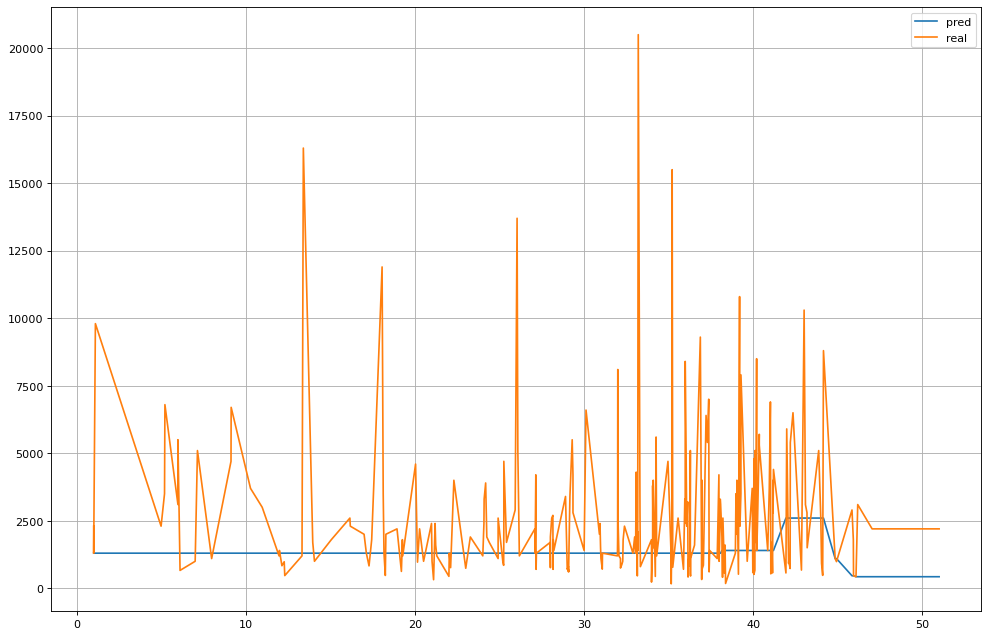

In [9]:
plt.figure(figsize=(15, 10), dpi=80)
plt.plot(X_svd, pred, label='pred')
plt.plot(X_svd, TRlikes, label='real')
plt.legend()
plt.grid()
plt.show()

Se procede a realizar la predicción de datos con los datos reservados previamente para las pruebas.

In [10]:
Xpred = pd.DataFrame([TSwords, TShashtags, TStags, TSfreq]).T

In [11]:
svd = TruncatedSVD(n_components=1, n_iter=7, random_state=42)
Xpred_svd = svd.fit_transform(Xpred) 
var = svd.explained_variance_ratio_
Xpred_svd = pd.DataFrame(data = Xpred_svd)
Xpred_svd = Xpred_svd.sort_values(by=[0]).values

In [12]:
pred = clf.predict(Xpred_svd)

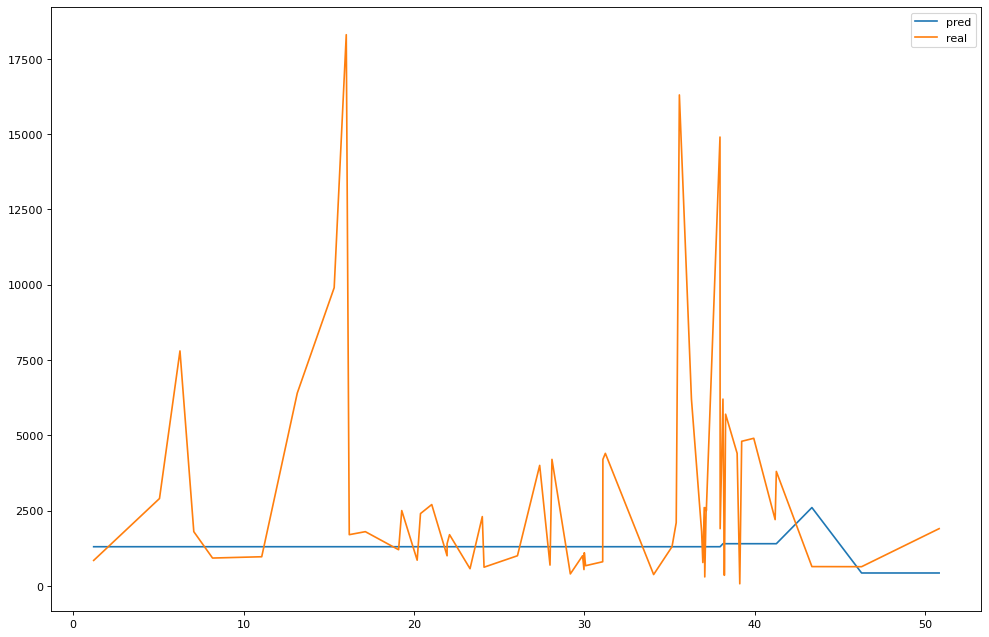

In [13]:
plt.figure(figsize=(15, 10), dpi=80)
plt.plot(Xpred_svd, pred, label='pred')
plt.plot(Xpred_svd, TSlikes, label='real')
plt.legend()
plt.show()

Como se puede ver en la gráfica, la predicción realizada por el algoritmo no es la mejor. Se puede decir que los parámetros de entrada escogidos no son los que definen cuál será la aceptación de la publicación. A continuación se presenta el Error Cuadrado Medio y el Error Absoluto Medio de las predicciones realizadas.

In [14]:
mse = mean_squared_error(TSlikes, pred)
mse

16568368.31147541

In [15]:
mae = mean_absolute_error(TSlikes, pred)
mae

2221.3934426229507

### Simulación sistema de vacunación

In [16]:
import simpy
import random
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Se toma uno de los recintos en la parroquia El Batán de Cuenca. En esta zona hay 12738 personas que deberán votar en uno de los tres Recintos Electorales [1]. Suponiendo que todas las personas se reparten equitativamente en los 3 recintos, en cada recinto se atenderán a 4246 personas. 

Puesto a que sólo el 80% de la población será vacunada, de las 4246 personas que deberían asistir al recinto, se espera que realmente asistan 3397 personas.

Puesto a que el horario de atención para la vacunación es de 08h00 a 17h00 [2], se define el tiempo de ejecución de la simulación diario en 540 (9 horas en minutos)

In [17]:
TIEMPO = 540
PUNTOS_VACUNACION0 = 6
PUNTOS_VACUNACION = 6
PUNTOS_VACUNACION2 = int(PUNTOS_VACUNACION/2)
DIAS = 100

vacunados1 = []
no_vacunados1 = []

s1 = 0
n1 = 0

vacunados2 = []
no_vacunados2 = []

s2 = 0
n2 = 0

In [18]:
class Centro_Covid(object):
    def __init__(self, env, puntos_vacunacion):
        self.env = env
        self.puntos_vacunacion = simpy.Resource(env, puntos_vacunacion)
        
    def poner_vacuna(self, paciente, dosis):
        global s1
        global s2
        print('> El %s va a vacunarse a las %.2f. %s' % (paciente, env.now, dosis))
        yield self.env.timeout(random.randint(5,10))
        print('> El %s ha sido vacunado a las %.2f. %s' % (paciente, env.now, dosis))
        if '1' in dosis:
            s1+=1
        else:
            s2+=1
    
    def esperar(self, paciente, dosis):
        print('_  El %s comienza su tiempo de espera a las %.2f. %s' % (paciente, env.now, dosis))
        yield self.env.timeout(20)
        print('_  El %s termina su tiempo de espera a las %.2f. %s' % (paciente, env.now, dosis))
        yield self.env.process(self.certificar(paciente, dosis))
        
    def certificar(self, paciente, dosis):
        print('@   El %s va a recibir su certificado a las %.2f. %s' % (paciente, env.now, dosis))
        yield self.env.timeout(random.randint(2,3))
        print('@   El %s ha recibido su certificado a las %.2f. %s y sale del recinto' % (paciente, env.now, dosis))

In [19]:
def llega_paciente(env, paciente, centro_covid, dosis):
    global n1
    global n2
    print('El %s llega al centro de vacunación a las %.2f. %s' % (paciente, env.now, dosis))
    with centro_covid.puntos_vacunacion.request() as punto_vacunacion:
        if random.randint(1,10) < 9:
            yield punto_vacunacion
            yield env.process(centro_covid.poner_vacuna(paciente, dosis))
            env.process(centro_covid.esperar(paciente, dosis))
        else:
            print('! El %s no ha podido vacunarse la %s y sale del recinto a las %.2f.' % (paciente, dosis, env.now))
            if '1' in dosis:
                n1+=1
            else:
                n2+=1

In [20]:
def ejecutar(env, puntos_vacunacion, dosis):
    centro_covid = Centro_Covid(env, puntos_vacunacion)
    for i in range(PUNTOS_VACUNACION):
        env.process(llega_paciente(env, 'Paciente %d' %(i+1), centro_covid, dosis))
        
    while True:
        yield env.timeout(random.randint(3,15))
        i+=1
        env.process(llega_paciente(env, 'Paciente %d' %(i+1), centro_covid, dosis))

In [21]:
random.seed(88)

for i in range(100):
    print()
    print('------ DÍA ' + str(i+1) + ' ------')
    print()
    
    s1 = 0
    n1 = 0
    s2 = 0
    n2 = 0
    
    env = simpy.Environment()
    if i >= 30:
        if sum(vacunados2) < 3397:
            env.process(ejecutar(env, PUNTOS_VACUNACION, '2da dosis'))
        if sum(vacunados1) < 3397:
            PUNTOS_VACUNACION = PUNTOS_VACUNACION2
        else:
            PUNTOS_VACUNACION = PUNTOS_VACUNACION0
    
    if sum(vacunados1) < 3397:
        env.process(ejecutar(env, PUNTOS_VACUNACION, '1ra dosis'))

        
    env.run(until=TIEMPO)
    
    vacunados1.append(s1)
    no_vacunados1.append(n1)
    vacunados2.append(s2)
    no_vacunados2.append(n2)


------ DÍA 1 ------

El Paciente 1 llega al centro de vacunación a las 0.00. 1ra dosis
El Paciente 2 llega al centro de vacunación a las 0.00. 1ra dosis
El Paciente 3 llega al centro de vacunación a las 0.00. 1ra dosis
El Paciente 4 llega al centro de vacunación a las 0.00. 1ra dosis
El Paciente 5 llega al centro de vacunación a las 0.00. 1ra dosis
! El Paciente 5 no ha podido vacunarse la 1ra dosis y sale del recinto a las 0.00.
El Paciente 6 llega al centro de vacunación a las 0.00. 1ra dosis
> El Paciente 1 va a vacunarse a las 0.00. 1ra dosis
> El Paciente 2 va a vacunarse a las 0.00. 1ra dosis
> El Paciente 3 va a vacunarse a las 0.00. 1ra dosis
> El Paciente 4 va a vacunarse a las 0.00. 1ra dosis
> El Paciente 6 va a vacunarse a las 0.00. 1ra dosis
> El Paciente 4 ha sido vacunado a las 6.00. 1ra dosis
> El Paciente 6 ha sido vacunado a las 6.00. 1ra dosis
_  El Paciente 4 comienza su tiempo de espera a las 6.00. 1ra dosis
_  El Paciente 6 comienza su tiempo de espera a las 6.00

> El Paciente 37 va a vacunarse a las 281.00. 1ra dosis
_  El Paciente 34 termina su tiempo de espera a las 284.00. 1ra dosis
@   El Paciente 34 va a recibir su certificado a las 284.00. 1ra dosis
> El Paciente 37 ha sido vacunado a las 286.00. 1ra dosis
@   El Paciente 34 ha recibido su certificado a las 286.00. 1ra dosis y sale del recinto
_  El Paciente 37 comienza su tiempo de espera a las 286.00. 1ra dosis
> El Paciente 36 ha sido vacunado a las 287.00. 1ra dosis
_  El Paciente 36 comienza su tiempo de espera a las 287.00. 1ra dosis
El Paciente 38 llega al centro de vacunación a las 291.00. 1ra dosis
> El Paciente 38 va a vacunarse a las 291.00. 1ra dosis
_  El Paciente 35 termina su tiempo de espera a las 293.00. 1ra dosis
@   El Paciente 35 va a recibir su certificado a las 293.00. 1ra dosis
@   El Paciente 35 ha recibido su certificado a las 296.00. 1ra dosis y sale del recinto
> El Paciente 38 ha sido vacunado a las 298.00. 1ra dosis
_  El Paciente 38 comienza su tiempo de esp

@   El Paciente 44 ha recibido su certificado a las 371.00. 1ra dosis y sale del recinto
@   El Paciente 45 ha recibido su certificado a las 372.00. 1ra dosis y sale del recinto
El Paciente 49 llega al centro de vacunación a las 379.00. 1ra dosis
> El Paciente 49 va a vacunarse a las 379.00. 1ra dosis
> El Paciente 49 ha sido vacunado a las 384.00. 1ra dosis
_  El Paciente 49 comienza su tiempo de espera a las 384.00. 1ra dosis
_  El Paciente 46 termina su tiempo de espera a las 388.00. 1ra dosis
@   El Paciente 46 va a recibir su certificado a las 388.00. 1ra dosis
_  El Paciente 48 termina su tiempo de espera a las 389.00. 1ra dosis
@   El Paciente 48 va a recibir su certificado a las 389.00. 1ra dosis
_  El Paciente 47 termina su tiempo de espera a las 390.00. 1ra dosis
@   El Paciente 47 va a recibir su certificado a las 390.00. 1ra dosis
El Paciente 50 llega al centro de vacunación a las 390.00. 1ra dosis
@   El Paciente 46 ha recibido su certificado a las 390.00. 1ra dosis y sale

_  El Paciente 13 comienza su tiempo de espera a las 71.00. 1ra dosis
@   El Paciente 10 ha recibido su certificado a las 73.00. 1ra dosis y sale del recinto
El Paciente 14 llega al centro de vacunación a las 76.00. 1ra dosis
> El Paciente 14 va a vacunarse a las 76.00. 1ra dosis
_  El Paciente 11 termina su tiempo de espera a las 78.00. 1ra dosis
@   El Paciente 11 va a recibir su certificado a las 78.00. 1ra dosis
> El Paciente 14 ha sido vacunado a las 81.00. 1ra dosis
@   El Paciente 11 ha recibido su certificado a las 81.00. 1ra dosis y sale del recinto
_  El Paciente 14 comienza su tiempo de espera a las 81.00. 1ra dosis
_  El Paciente 12 termina su tiempo de espera a las 86.00. 1ra dosis
@   El Paciente 12 va a recibir su certificado a las 86.00. 1ra dosis
@   El Paciente 12 ha recibido su certificado a las 88.00. 1ra dosis y sale del recinto
El Paciente 15 llega al centro de vacunación a las 90.00. 1ra dosis
> El Paciente 15 va a vacunarse a las 90.00. 1ra dosis
_  El Paciente 

_  El Paciente 27 comienza su tiempo de espera a las 190.00. 1ra dosis
El Paciente 28 llega al centro de vacunación a las 191.00. 1ra dosis
! El Paciente 28 no ha podido vacunarse la 1ra dosis y sale del recinto a las 191.00.
_  El Paciente 25 termina su tiempo de espera a las 192.00. 1ra dosis
@   El Paciente 25 va a recibir su certificado a las 192.00. 1ra dosis
@   El Paciente 25 ha recibido su certificado a las 194.00. 1ra dosis y sale del recinto
El Paciente 29 llega al centro de vacunación a las 198.00. 1ra dosis
> El Paciente 29 va a vacunarse a las 198.00. 1ra dosis
_  El Paciente 26 termina su tiempo de espera a las 206.00. 1ra dosis
@   El Paciente 26 va a recibir su certificado a las 206.00. 1ra dosis
El Paciente 30 llega al centro de vacunación a las 207.00. 1ra dosis
> El Paciente 29 ha sido vacunado a las 207.00. 1ra dosis
> El Paciente 30 va a vacunarse a las 207.00. 1ra dosis
_  El Paciente 29 comienza su tiempo de espera a las 207.00. 1ra dosis
@   El Paciente 26 ha re

_  El Paciente 21 comienza su tiempo de espera a las 135.00. 1ra dosis
El Paciente 22 llega al centro de vacunación a las 142.00. 1ra dosis
> El Paciente 22 va a vacunarse a las 142.00. 1ra dosis
El Paciente 23 llega al centro de vacunación a las 145.00. 1ra dosis
> El Paciente 23 va a vacunarse a las 145.00. 1ra dosis
_  El Paciente 19 termina su tiempo de espera a las 146.00. 1ra dosis
@   El Paciente 19 va a recibir su certificado a las 146.00. 1ra dosis
@   El Paciente 19 ha recibido su certificado a las 149.00. 1ra dosis y sale del recinto
> El Paciente 22 ha sido vacunado a las 151.00. 1ra dosis
_  El Paciente 22 comienza su tiempo de espera a las 151.00. 1ra dosis
> El Paciente 23 ha sido vacunado a las 152.00. 1ra dosis
_  El Paciente 23 comienza su tiempo de espera a las 152.00. 1ra dosis
_  El Paciente 21 termina su tiempo de espera a las 155.00. 1ra dosis
@   El Paciente 21 va a recibir su certificado a las 155.00. 1ra dosis
El Paciente 24 llega al centro de vacunación a las

@   El Paciente 42 va a recibir su certificado a las 357.00. 1ra dosis
_  El Paciente 43 termina su tiempo de espera a las 358.00. 1ra dosis
@   El Paciente 43 va a recibir su certificado a las 358.00. 1ra dosis
@   El Paciente 42 ha recibido su certificado a las 359.00. 1ra dosis y sale del recinto
El Paciente 47 llega al centro de vacunación a las 360.00. 1ra dosis
@   El Paciente 43 ha recibido su certificado a las 360.00. 1ra dosis y sale del recinto
> El Paciente 47 va a vacunarse a las 360.00. 1ra dosis
_  El Paciente 44 termina su tiempo de espera a las 364.00. 1ra dosis
@   El Paciente 44 va a recibir su certificado a las 364.00. 1ra dosis
> El Paciente 47 ha sido vacunado a las 366.00. 1ra dosis
@   El Paciente 44 ha recibido su certificado a las 366.00. 1ra dosis y sale del recinto
_  El Paciente 47 comienza su tiempo de espera a las 366.00. 1ra dosis
El Paciente 48 llega al centro de vacunación a las 368.00. 1ra dosis
> El Paciente 48 va a vacunarse a las 368.00. 1ra dosis
_

@   El Paciente 14 ha recibido su certificado a las 121.00. 1ra dosis y sale del recinto
El Paciente 17 llega al centro de vacunación a las 123.00. 2da dosis
> El Paciente 17 va a vacunarse a las 123.00. 2da dosis
El Paciente 18 llega al centro de vacunación a las 124.00. 1ra dosis
! El Paciente 18 no ha podido vacunarse la 1ra dosis y sale del recinto a las 124.00.
> El Paciente 17 ha sido vacunado a las 128.00. 2da dosis
_  El Paciente 17 comienza su tiempo de espera a las 128.00. 2da dosis
_  El Paciente 14 termina su tiempo de espera a las 130.00. 2da dosis
@   El Paciente 14 va a recibir su certificado a las 130.00. 2da dosis
> El Paciente 17 ha sido vacunado a las 130.00. 1ra dosis
_  El Paciente 17 comienza su tiempo de espera a las 130.00. 1ra dosis
El Paciente 19 llega al centro de vacunación a las 131.00. 1ra dosis
> El Paciente 19 va a vacunarse a las 131.00. 1ra dosis
_  El Paciente 15 termina su tiempo de espera a las 133.00. 2da dosis
@   El Paciente 15 va a recibir su ce

@   El Paciente 57 ha recibido su certificado a las 524.00. 2da dosis y sale del recinto
El Paciente 60 llega al centro de vacunación a las 530.00. 2da dosis
> El Paciente 60 va a vacunarse a las 530.00. 2da dosis
> El Paciente 57 ha sido vacunado a las 531.00. 1ra dosis
_  El Paciente 57 comienza su tiempo de espera a las 531.00. 1ra dosis
> El Paciente 60 ha sido vacunado a las 535.00. 2da dosis
_  El Paciente 60 comienza su tiempo de espera a las 535.00. 2da dosis
El Paciente 58 llega al centro de vacunación a las 536.00. 1ra dosis
> El Paciente 58 va a vacunarse a las 536.00. 1ra dosis
_  El Paciente 58 termina su tiempo de espera a las 537.00. 2da dosis
@   El Paciente 58 va a recibir su certificado a las 537.00. 2da dosis

------ DÍA 34 ------

El Paciente 1 llega al centro de vacunación a las 0.00. 2da dosis
! El Paciente 1 no ha podido vacunarse la 2da dosis y sale del recinto a las 0.00.
El Paciente 2 llega al centro de vacunación a las 0.00. 2da dosis
! El Paciente 2 no ha po

> El Paciente 34 ha sido vacunado a las 262.00. 1ra dosis
@   El Paciente 32 ha recibido su certificado a las 262.00. 1ra dosis y sale del recinto
_  El Paciente 34 comienza su tiempo de espera a las 262.00. 1ra dosis
@   El Paciente 28 ha recibido su certificado a las 264.00. 2da dosis y sale del recinto
_  El Paciente 29 termina su tiempo de espera a las 265.00. 2da dosis
@   El Paciente 29 va a recibir su certificado a las 265.00. 2da dosis
El Paciente 32 llega al centro de vacunación a las 265.00. 2da dosis
> El Paciente 32 va a vacunarse a las 265.00. 2da dosis
> El Paciente 31 ha sido vacunado a las 266.00. 2da dosis
_  El Paciente 31 comienza su tiempo de espera a las 266.00. 2da dosis
El Paciente 35 llega al centro de vacunación a las 267.00. 1ra dosis
! El Paciente 35 no ha podido vacunarse la 1ra dosis y sale del recinto a las 267.00.
@   El Paciente 29 ha recibido su certificado a las 267.00. 2da dosis y sale del recinto
_  El Paciente 33 termina su tiempo de espera a las 27

@   El Paciente 25 va a recibir su certificado a las 235.00. 1ra dosis
El Paciente 28 llega al centro de vacunación a las 235.00. 1ra dosis
! El Paciente 28 no ha podido vacunarse la 1ra dosis y sale del recinto a las 235.00.
@   El Paciente 28 ha recibido su certificado a las 237.00. 2da dosis y sale del recinto
@   El Paciente 25 ha recibido su certificado a las 237.00. 1ra dosis y sale del recinto
El Paciente 29 llega al centro de vacunación a las 239.00. 1ra dosis
> El Paciente 29 va a vacunarse a las 239.00. 1ra dosis
El Paciente 31 llega al centro de vacunación a las 240.00. 2da dosis
! El Paciente 31 no ha podido vacunarse la 2da dosis y sale del recinto a las 240.00.
> El Paciente 30 ha sido vacunado a las 243.00. 2da dosis
_  El Paciente 30 comienza su tiempo de espera a las 243.00. 2da dosis
> El Paciente 29 ha sido vacunado a las 244.00. 1ra dosis
_  El Paciente 29 comienza su tiempo de espera a las 244.00. 1ra dosis
_  El Paciente 26 termina su tiempo de espera a las 247.00

El Paciente 33 llega al centro de vacunación a las 254.00. 1ra dosis
! El Paciente 33 no ha podido vacunarse la 1ra dosis y sale del recinto a las 254.00.
El Paciente 35 llega al centro de vacunación a las 254.00. 2da dosis
> El Paciente 35 va a vacunarse a las 254.00. 2da dosis
> El Paciente 34 ha sido vacunado a las 256.00. 2da dosis
_  El Paciente 34 comienza su tiempo de espera a las 256.00. 2da dosis
El Paciente 36 llega al centro de vacunación a las 260.00. 2da dosis
> El Paciente 36 va a vacunarse a las 260.00. 2da dosis
_  El Paciente 31 termina su tiempo de espera a las 262.00. 2da dosis
@   El Paciente 31 va a recibir su certificado a las 262.00. 2da dosis
> El Paciente 35 ha sido vacunado a las 262.00. 2da dosis
_  El Paciente 35 comienza su tiempo de espera a las 262.00. 2da dosis
El Paciente 34 llega al centro de vacunación a las 263.00. 1ra dosis
> El Paciente 34 va a vacunarse a las 263.00. 1ra dosis
_  El Paciente 32 termina su tiempo de espera a las 265.00. 2da dosis
@

> El Paciente 13 va a vacunarse a las 77.00. 2da dosis
_  El Paciente 8 termina su tiempo de espera a las 81.00. 2da dosis
@   El Paciente 8 va a recibir su certificado a las 81.00. 2da dosis
> El Paciente 12 ha sido vacunado a las 82.00. 2da dosis
El Paciente 14 llega al centro de vacunación a las 82.00. 2da dosis
_  El Paciente 12 comienza su tiempo de espera a las 82.00. 2da dosis
> El Paciente 14 va a vacunarse a las 82.00. 2da dosis
_  El Paciente 9 termina su tiempo de espera a las 83.00. 1ra dosis
@   El Paciente 9 va a recibir su certificado a las 83.00. 1ra dosis
_  El Paciente 9 termina su tiempo de espera a las 83.00. 2da dosis
@   El Paciente 9 va a recibir su certificado a las 83.00. 2da dosis
El Paciente 12 llega al centro de vacunación a las 83.00. 1ra dosis
> El Paciente 12 va a vacunarse a las 83.00. 1ra dosis
@   El Paciente 8 ha recibido su certificado a las 84.00. 2da dosis y sale del recinto
_  El Paciente 10 termina su tiempo de espera a las 85.00. 1ra dosis
@   E

@   El Paciente 21 ha recibido su certificado a las 187.00. 1ra dosis y sale del recinto
_  El Paciente 23 comienza su tiempo de espera a las 187.00. 2da dosis
@   El Paciente 21 ha recibido su certificado a las 188.00. 2da dosis y sale del recinto
El Paciente 25 llega al centro de vacunación a las 193.00. 1ra dosis
> El Paciente 25 va a vacunarse a las 193.00. 1ra dosis
El Paciente 24 llega al centro de vacunación a las 194.00. 2da dosis
> El Paciente 24 va a vacunarse a las 194.00. 2da dosis
_  El Paciente 23 termina su tiempo de espera a las 196.00. 1ra dosis
@   El Paciente 23 va a recibir su certificado a las 196.00. 1ra dosis
@   El Paciente 23 ha recibido su certificado a las 199.00. 1ra dosis y sale del recinto
_  El Paciente 22 termina su tiempo de espera a las 200.00. 2da dosis
@   El Paciente 22 va a recibir su certificado a las 200.00. 2da dosis
> El Paciente 25 ha sido vacunado a las 201.00. 1ra dosis
> El Paciente 24 ha sido vacunado a las 201.00. 2da dosis
_  El Paciente

> El Paciente 48 ha sido vacunado a las 430.00. 1ra dosis
_  El Paciente 48 comienza su tiempo de espera a las 430.00. 1ra dosis
_  El Paciente 41 termina su tiempo de espera a las 434.00. 2da dosis
@   El Paciente 41 va a recibir su certificado a las 434.00. 2da dosis
_  El Paciente 47 termina su tiempo de espera a las 435.00. 1ra dosis
@   El Paciente 47 va a recibir su certificado a las 435.00. 1ra dosis
El Paciente 49 llega al centro de vacunación a las 436.00. 1ra dosis
El Paciente 43 llega al centro de vacunación a las 436.00. 2da dosis
> El Paciente 49 va a vacunarse a las 436.00. 1ra dosis
> El Paciente 43 va a vacunarse a las 436.00. 2da dosis
@   El Paciente 41 ha recibido su certificado a las 437.00. 2da dosis y sale del recinto
@   El Paciente 47 ha recibido su certificado a las 438.00. 1ra dosis y sale del recinto
> El Paciente 43 ha sido vacunado a las 442.00. 2da dosis
_  El Paciente 43 comienza su tiempo de espera a las 442.00. 2da dosis
El Paciente 50 llega al centro d

El Paciente 61 llega al centro de vacunación a las 522.00. 2da dosis
! El Paciente 61 no ha podido vacunarse la 2da dosis y sale del recinto a las 522.00.
El Paciente 57 llega al centro de vacunación a las 524.00. 1ra dosis
> El Paciente 60 ha sido vacunado a las 524.00. 2da dosis
> El Paciente 57 va a vacunarse a las 524.00. 1ra dosis
_  El Paciente 60 comienza su tiempo de espera a las 524.00. 2da dosis
> El Paciente 57 ha sido vacunado a las 531.00. 1ra dosis
_  El Paciente 57 comienza su tiempo de espera a las 531.00. 1ra dosis
El Paciente 62 llega al centro de vacunación a las 533.00. 2da dosis
! El Paciente 62 no ha podido vacunarse la 2da dosis y sale del recinto a las 533.00.
_  El Paciente 59 termina su tiempo de espera a las 536.00. 2da dosis
@   El Paciente 59 va a recibir su certificado a las 536.00. 2da dosis
El Paciente 58 llega al centro de vacunación a las 537.00. 1ra dosis
> El Paciente 58 va a vacunarse a las 537.00. 1ra dosis
_  El Paciente 56 termina su tiempo de es

El Paciente 12 llega al centro de vacunación a las 79.00. 1ra dosis
> El Paciente 11 va a vacunarse a las 79.00. 2da dosis
> El Paciente 12 va a vacunarse a las 79.00. 1ra dosis
_  El Paciente 8 termina su tiempo de espera a las 80.00. 2da dosis
@   El Paciente 8 va a recibir su certificado a las 80.00. 2da dosis
@   El Paciente 8 ha recibido su certificado a las 82.00. 2da dosis y sale del recinto
_  El Paciente 10 termina su tiempo de espera a las 83.00. 1ra dosis
@   El Paciente 10 va a recibir su certificado a las 83.00. 1ra dosis
_  El Paciente 9 termina su tiempo de espera a las 84.00. 2da dosis
@   El Paciente 9 va a recibir su certificado a las 84.00. 2da dosis
El Paciente 12 llega al centro de vacunación a las 85.00. 2da dosis
> El Paciente 12 va a vacunarse a las 85.00. 2da dosis
@   El Paciente 10 ha recibido su certificado a las 86.00. 1ra dosis y sale del recinto
> El Paciente 11 ha sido vacunado a las 87.00. 2da dosis
> El Paciente 12 ha sido vacunado a las 87.00. 1ra dos

> El Paciente 18 ha sido vacunado a las 146.00. 2da dosis
_  El Paciente 19 comienza su tiempo de espera a las 146.00. 1ra dosis
> El Paciente 19 va a vacunarse a las 146.00. 2da dosis
_  El Paciente 18 comienza su tiempo de espera a las 146.00. 2da dosis
_  El Paciente 17 termina su tiempo de espera a las 151.00. 2da dosis
@   El Paciente 17 va a recibir su certificado a las 151.00. 2da dosis
_  El Paciente 18 termina su tiempo de espera a las 153.00. 1ra dosis
@   El Paciente 18 va a recibir su certificado a las 153.00. 1ra dosis
> El Paciente 19 ha sido vacunado a las 153.00. 2da dosis
_  El Paciente 19 comienza su tiempo de espera a las 153.00. 2da dosis
El Paciente 20 llega al centro de vacunación a las 154.00. 2da dosis
! El Paciente 20 no ha podido vacunarse la 2da dosis y sale del recinto a las 154.00.
@   El Paciente 17 ha recibido su certificado a las 154.00. 2da dosis y sale del recinto
@   El Paciente 18 ha recibido su certificado a las 156.00. 1ra dosis y sale del recinto


> El Paciente 21 va a vacunarse a las 162.00. 1ra dosis
El Paciente 19 llega al centro de vacunación a las 165.00. 2da dosis
> El Paciente 18 ha sido vacunado a las 165.00. 2da dosis
El Paciente 22 llega al centro de vacunación a las 165.00. 1ra dosis
> El Paciente 19 va a vacunarse a las 165.00. 2da dosis
_  El Paciente 18 comienza su tiempo de espera a las 165.00. 2da dosis
> El Paciente 22 va a vacunarse a las 165.00. 1ra dosis
_  El Paciente 18 termina su tiempo de espera a las 169.00. 1ra dosis
@   El Paciente 18 va a recibir su certificado a las 169.00. 1ra dosis
_  El Paciente 16 termina su tiempo de espera a las 170.00. 2da dosis
@   El Paciente 16 va a recibir su certificado a las 170.00. 2da dosis
> El Paciente 19 ha sido vacunado a las 170.00. 2da dosis
_  El Paciente 19 comienza su tiempo de espera a las 170.00. 2da dosis
@   El Paciente 18 ha recibido su certificado a las 171.00. 1ra dosis y sale del recinto
> El Paciente 21 ha sido vacunado a las 172.00. 1ra dosis
@   El 

@   El Paciente 30 ha recibido su certificado a las 269.00. 1ra dosis y sale del recinto
> El Paciente 33 va a vacunarse a las 269.00. 2da dosis
> El Paciente 32 ha sido vacunado a las 270.00. 2da dosis
_  El Paciente 32 comienza su tiempo de espera a las 270.00. 2da dosis
El Paciente 34 llega al centro de vacunación a las 271.00. 1ra dosis
> El Paciente 34 va a vacunarse a las 271.00. 1ra dosis
> El Paciente 33 ha sido vacunado a las 272.00. 1ra dosis
_  El Paciente 33 comienza su tiempo de espera a las 272.00. 1ra dosis
_  El Paciente 29 termina su tiempo de espera a las 274.00. 2da dosis
@   El Paciente 29 va a recibir su certificado a las 274.00. 2da dosis
_  El Paciente 31 termina su tiempo de espera a las 276.00. 1ra dosis
@   El Paciente 31 va a recibir su certificado a las 276.00. 1ra dosis
@   El Paciente 29 ha recibido su certificado a las 276.00. 2da dosis y sale del recinto
El Paciente 34 llega al centro de vacunación a las 277.00. 2da dosis
> El Paciente 34 ha sido vacunad

> El Paciente 59 va a vacunarse a las 462.00. 2da dosis
@   El Paciente 55 ha recibido su certificado a las 463.00. 2da dosis y sale del recinto
> El Paciente 56 ha sido vacunado a las 465.00. 1ra dosis
_  El Paciente 56 comienza su tiempo de espera a las 465.00. 1ra dosis
_  El Paciente 56 termina su tiempo de espera a las 466.00. 2da dosis
@   El Paciente 56 va a recibir su certificado a las 466.00. 2da dosis
> El Paciente 58 ha sido vacunado a las 466.00. 2da dosis
_  El Paciente 58 comienza su tiempo de espera a las 466.00. 2da dosis
@   El Paciente 56 ha recibido su certificado a las 468.00. 2da dosis y sale del recinto
El Paciente 57 llega al centro de vacunación a las 469.00. 1ra dosis
! El Paciente 57 no ha podido vacunarse la 1ra dosis y sale del recinto a las 469.00.
> El Paciente 59 ha sido vacunado a las 472.00. 2da dosis
_  El Paciente 59 comienza su tiempo de espera a las 472.00. 2da dosis
El Paciente 60 llega al centro de vacunación a las 476.00. 2da dosis
> El Paciente 

> El Paciente 50 va a vacunarse a las 391.00. 1ra dosis
@   El Paciente 46 ha recibido su certificado a las 393.00. 1ra dosis y sale del recinto
@   El Paciente 46 ha recibido su certificado a las 393.00. 2da dosis y sale del recinto
El Paciente 49 llega al centro de vacunación a las 396.00. 2da dosis
> El Paciente 48 ha sido vacunado a las 396.00. 2da dosis
> El Paciente 49 va a vacunarse a las 396.00. 2da dosis
_  El Paciente 48 comienza su tiempo de espera a las 396.00. 2da dosis
> El Paciente 50 ha sido vacunado a las 397.00. 1ra dosis
_  El Paciente 50 comienza su tiempo de espera a las 397.00. 1ra dosis
_  El Paciente 47 termina su tiempo de espera a las 400.00. 2da dosis
@   El Paciente 47 va a recibir su certificado a las 400.00. 2da dosis
El Paciente 51 llega al centro de vacunación a las 402.00. 1ra dosis
@   El Paciente 47 ha recibido su certificado a las 402.00. 2da dosis y sale del recinto
> El Paciente 51 va a vacunarse a las 402.00. 1ra dosis
> El Paciente 49 ha sido vac

> El Paciente 45 ha sido vacunado a las 365.00. 1ra dosis
_  El Paciente 45 comienza su tiempo de espera a las 365.00. 1ra dosis
El Paciente 42 llega al centro de vacunación a las 366.00. 2da dosis
@   El Paciente 39 ha recibido su certificado a las 366.00. 2da dosis y sale del recinto
> El Paciente 42 va a vacunarse a las 366.00. 2da dosis
El Paciente 46 llega al centro de vacunación a las 369.00. 1ra dosis
> El Paciente 46 va a vacunarse a las 369.00. 1ra dosis
El Paciente 43 llega al centro de vacunación a las 370.00. 2da dosis
> El Paciente 43 va a vacunarse a las 370.00. 2da dosis
> El Paciente 46 ha sido vacunado a las 374.00. 1ra dosis
_  El Paciente 46 comienza su tiempo de espera a las 374.00. 1ra dosis
> El Paciente 43 ha sido vacunado a las 375.00. 2da dosis
_  El Paciente 43 comienza su tiempo de espera a las 375.00. 2da dosis
_  El Paciente 43 termina su tiempo de espera a las 376.00. 1ra dosis
@   El Paciente 43 va a recibir su certificado a las 376.00. 1ra dosis
_  El Pa

@   El Paciente 56 ha recibido su certificado a las 520.00. 2da dosis y sale del recinto
> El Paciente 59 va a vacunarse a las 520.00. 1ra dosis
_  El Paciente 55 termina su tiempo de espera a las 521.00. 1ra dosis
@   El Paciente 55 va a recibir su certificado a las 521.00. 1ra dosis
El Paciente 59 llega al centro de vacunación a las 523.00. 2da dosis
! El Paciente 59 no ha podido vacunarse la 2da dosis y sale del recinto a las 523.00.
@   El Paciente 55 ha recibido su certificado a las 524.00. 1ra dosis y sale del recinto
> El Paciente 59 ha sido vacunado a las 529.00. 1ra dosis
_  El Paciente 59 comienza su tiempo de espera a las 529.00. 1ra dosis
El Paciente 60 llega al centro de vacunación a las 530.00. 1ra dosis
> El Paciente 60 va a vacunarse a las 530.00. 1ra dosis
_  El Paciente 58 termina su tiempo de espera a las 536.00. 2da dosis
@   El Paciente 58 va a recibir su certificado a las 536.00. 2da dosis
> El Paciente 60 ha sido vacunado a las 536.00. 1ra dosis
_  El Paciente 60

_  El Paciente 4 comienza su tiempo de espera a las 13.00. 2da dosis
> El Paciente 5 ha sido vacunado a las 16.00. 2da dosis
_  El Paciente 5 comienza su tiempo de espera a las 16.00. 2da dosis
> El Paciente 7 ha sido vacunado a las 20.00. 2da dosis
_  El Paciente 7 comienza su tiempo de espera a las 20.00. 2da dosis
El Paciente 8 llega al centro de vacunación a las 25.00. 2da dosis
> El Paciente 8 va a vacunarse a las 25.00. 2da dosis
_  El Paciente 2 termina su tiempo de espera a las 27.00. 2da dosis
@   El Paciente 2 va a recibir su certificado a las 27.00. 2da dosis
_  El Paciente 1 termina su tiempo de espera a las 28.00. 2da dosis
@   El Paciente 1 va a recibir su certificado a las 28.00. 2da dosis
_  El Paciente 3 termina su tiempo de espera a las 30.00. 2da dosis
@   El Paciente 3 va a recibir su certificado a las 30.00. 2da dosis
@   El Paciente 2 ha recibido su certificado a las 30.00. 2da dosis y sale del recinto
@   El Paciente 1 ha recibido su certificado a las 30.00. 2da 

@   El Paciente 35 va a recibir su certificado a las 267.00. 2da dosis
@   El Paciente 35 ha recibido su certificado a las 269.00. 2da dosis y sale del recinto
> El Paciente 37 ha sido vacunado a las 274.00. 2da dosis
_  El Paciente 37 comienza su tiempo de espera a las 274.00. 2da dosis
El Paciente 38 llega al centro de vacunación a las 277.00. 2da dosis
> El Paciente 38 va a vacunarse a las 277.00. 2da dosis
_  El Paciente 36 termina su tiempo de espera a las 280.00. 2da dosis
@   El Paciente 36 va a recibir su certificado a las 280.00. 2da dosis
@   El Paciente 36 ha recibido su certificado a las 283.00. 2da dosis y sale del recinto
El Paciente 39 llega al centro de vacunación a las 286.00. 2da dosis
> El Paciente 38 ha sido vacunado a las 286.00. 2da dosis
> El Paciente 39 va a vacunarse a las 286.00. 2da dosis
_  El Paciente 38 comienza su tiempo de espera a las 286.00. 2da dosis
> El Paciente 39 ha sido vacunado a las 291.00. 2da dosis
_  El Paciente 39 comienza su tiempo de espe

_  El Paciente 21 comienza su tiempo de espera a las 136.00. 2da dosis
@   El Paciente 18 ha recibido su certificado a las 138.00. 2da dosis y sale del recinto
El Paciente 22 llega al centro de vacunación a las 139.00. 2da dosis
> El Paciente 22 va a vacunarse a las 139.00. 2da dosis
_  El Paciente 19 termina su tiempo de espera a las 140.00. 2da dosis
@   El Paciente 19 va a recibir su certificado a las 140.00. 2da dosis
@   El Paciente 19 ha recibido su certificado a las 143.00. 2da dosis y sale del recinto
El Paciente 23 llega al centro de vacunación a las 144.00. 2da dosis
> El Paciente 22 ha sido vacunado a las 144.00. 2da dosis
> El Paciente 23 va a vacunarse a las 144.00. 2da dosis
_  El Paciente 22 comienza su tiempo de espera a las 144.00. 2da dosis
El Paciente 24 llega al centro de vacunación a las 147.00. 2da dosis
> El Paciente 24 va a vacunarse a las 147.00. 2da dosis
_  El Paciente 20 termina su tiempo de espera a las 148.00. 2da dosis
@   El Paciente 20 va a recibir su c

_  El Paciente 59 termina su tiempo de espera a las 500.00. 2da dosis
@   El Paciente 59 va a recibir su certificado a las 500.00. 2da dosis
El Paciente 62 llega al centro de vacunación a las 501.00. 2da dosis
! El Paciente 62 no ha podido vacunarse la 2da dosis y sale del recinto a las 501.00.
@   El Paciente 59 ha recibido su certificado a las 503.00. 2da dosis y sale del recinto
_  El Paciente 60 termina su tiempo de espera a las 505.00. 2da dosis
@   El Paciente 60 va a recibir su certificado a las 505.00. 2da dosis
@   El Paciente 60 ha recibido su certificado a las 507.00. 2da dosis y sale del recinto
El Paciente 63 llega al centro de vacunación a las 514.00. 2da dosis
> El Paciente 63 va a vacunarse a las 514.00. 2da dosis
_  El Paciente 61 termina su tiempo de espera a las 516.00. 2da dosis
@   El Paciente 61 va a recibir su certificado a las 516.00. 2da dosis
@   El Paciente 61 ha recibido su certificado a las 519.00. 2da dosis y sale del recinto
El Paciente 64 llega al centro

> El Paciente 20 va a vacunarse a las 122.00. 2da dosis
> El Paciente 19 ha sido vacunado a las 126.00. 2da dosis
_  El Paciente 19 comienza su tiempo de espera a las 126.00. 2da dosis
> El Paciente 20 ha sido vacunado a las 129.00. 2da dosis
_  El Paciente 20 comienza su tiempo de espera a las 129.00. 2da dosis
_  El Paciente 18 termina su tiempo de espera a las 130.00. 2da dosis
@   El Paciente 18 va a recibir su certificado a las 130.00. 2da dosis
El Paciente 21 llega al centro de vacunación a las 132.00. 2da dosis
! El Paciente 21 no ha podido vacunarse la 2da dosis y sale del recinto a las 132.00.
@   El Paciente 18 ha recibido su certificado a las 132.00. 2da dosis y sale del recinto
El Paciente 22 llega al centro de vacunación a las 141.00. 2da dosis
> El Paciente 22 va a vacunarse a las 141.00. 2da dosis
_  El Paciente 19 termina su tiempo de espera a las 146.00. 2da dosis
@   El Paciente 19 va a recibir su certificado a las 146.00. 2da dosis
> El Paciente 22 ha sido vacunado a

! El Paciente 65 no ha podido vacunarse la 2da dosis y sale del recinto a las 539.00.
@   El Paciente 63 ha recibido su certificado a las 539.00. 2da dosis y sale del recinto

------ DÍA 87 ------

El Paciente 1 llega al centro de vacunación a las 0.00. 2da dosis
El Paciente 2 llega al centro de vacunación a las 0.00. 2da dosis
El Paciente 3 llega al centro de vacunación a las 0.00. 2da dosis
El Paciente 4 llega al centro de vacunación a las 0.00. 2da dosis
El Paciente 5 llega al centro de vacunación a las 0.00. 2da dosis
El Paciente 6 llega al centro de vacunación a las 0.00. 2da dosis
> El Paciente 1 va a vacunarse a las 0.00. 2da dosis
> El Paciente 2 va a vacunarse a las 0.00. 2da dosis
> El Paciente 3 va a vacunarse a las 0.00. 2da dosis
> El Paciente 4 va a vacunarse a las 0.00. 2da dosis
> El Paciente 5 va a vacunarse a las 0.00. 2da dosis
> El Paciente 6 va a vacunarse a las 0.00. 2da dosis
> El Paciente 5 ha sido vacunado a las 5.00. 2da dosis
_  El Paciente 5 comienza su tiem

! El Paciente 12 no ha podido vacunarse la 2da dosis y sale del recinto a las 44.00.
_  El Paciente 10 comienza su tiempo de espera a las 44.00. 2da dosis
> El Paciente 11 ha sido vacunado a las 46.00. 2da dosis
@   El Paciente 7 ha recibido su certificado a las 46.00. 2da dosis y sale del recinto
_  El Paciente 11 comienza su tiempo de espera a las 46.00. 2da dosis
_  El Paciente 8 termina su tiempo de espera a las 48.00. 2da dosis
@   El Paciente 8 va a recibir su certificado a las 48.00. 2da dosis
@   El Paciente 8 ha recibido su certificado a las 50.00. 2da dosis y sale del recinto
El Paciente 13 llega al centro de vacunación a las 56.00. 2da dosis
> El Paciente 13 va a vacunarse a las 56.00. 2da dosis
El Paciente 14 llega al centro de vacunación a las 63.00. 2da dosis
! El Paciente 14 no ha podido vacunarse la 2da dosis y sale del recinto a las 63.00.
_  El Paciente 10 termina su tiempo de espera a las 64.00. 2da dosis
@   El Paciente 10 va a recibir su certificado a las 64.00. 2d

@   El Paciente 39 va a recibir su certificado a las 318.00. 2da dosis
@   El Paciente 38 ha recibido su certificado a las 318.00. 2da dosis y sale del recinto
@   El Paciente 39 ha recibido su certificado a las 320.00. 2da dosis y sale del recinto
El Paciente 42 llega al centro de vacunación a las 321.00. 2da dosis
> El Paciente 42 va a vacunarse a las 321.00. 2da dosis
_  El Paciente 40 termina su tiempo de espera a las 326.00. 2da dosis
@   El Paciente 40 va a recibir su certificado a las 326.00. 2da dosis
> El Paciente 42 ha sido vacunado a las 328.00. 2da dosis
@   El Paciente 40 ha recibido su certificado a las 328.00. 2da dosis y sale del recinto
_  El Paciente 42 comienza su tiempo de espera a las 328.00. 2da dosis
El Paciente 43 llega al centro de vacunación a las 332.00. 2da dosis
> El Paciente 43 va a vacunarse a las 332.00. 2da dosis
_  El Paciente 41 termina su tiempo de espera a las 334.00. 2da dosis
@   El Paciente 41 va a recibir su certificado a las 334.00. 2da dosis
E

<ipython-input-25-b5f5938cecb0>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


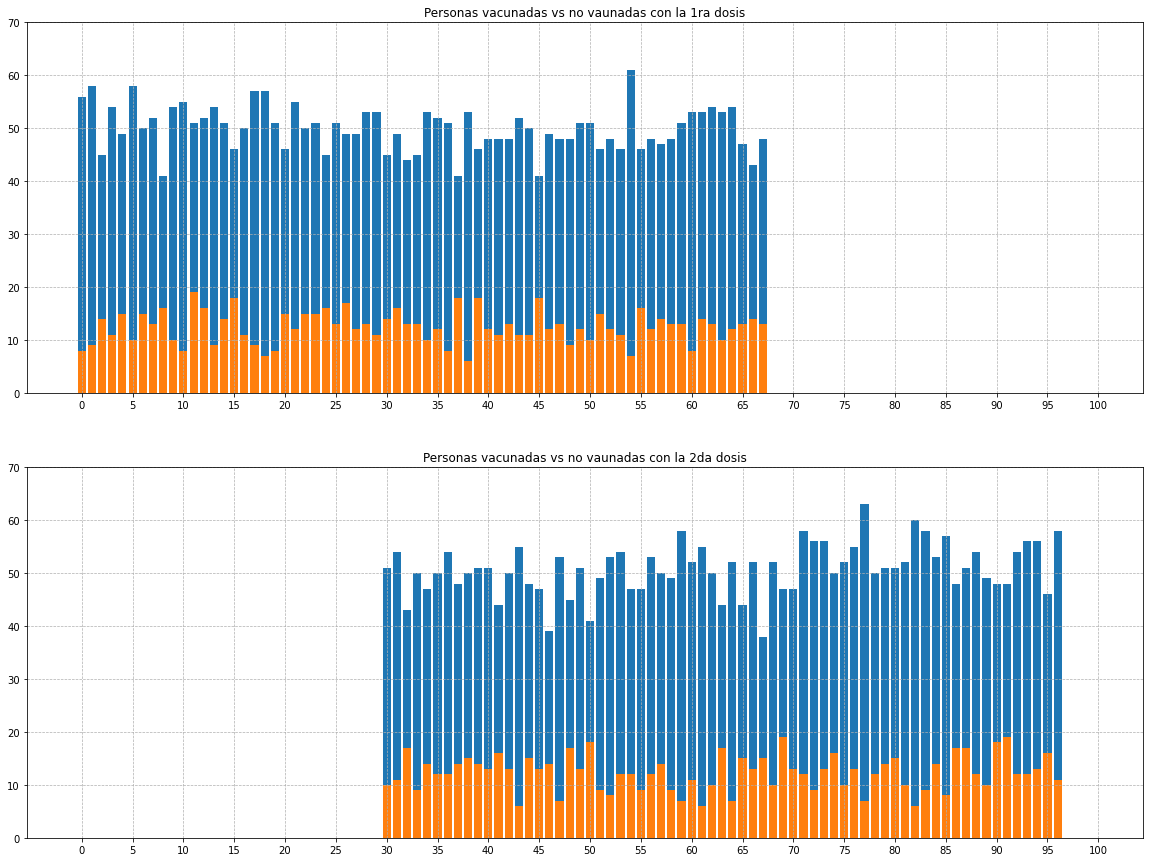

In [25]:
x = np.arange(len(vacunados1))
fig, (ax1, ax2) = plt.subplots(2, figsize=(20,15))
ax1.set_title('Personas vacunadas vs no vaunadas con la 1ra dosis')
ax1.bar(x, vacunados1)
ax1.bar(x, no_vacunados1)
ax1.grid(linestyle='--', linewidth=0.7)
ax1.set_xticks(np.arange(0,101,5))
ax1.set_yticks(np.arange(0, 71, 10))

ax2.set_title('Personas vacunadas vs no vaunadas con la 2da dosis')
ax2.bar(x, vacunados2)
ax2.bar(x, no_vacunados2)
ax2.grid(linestyle='--', linewidth=0.7)
ax2.set_xticks(np.arange(0,101,5))
ax2.set_yticks(np.arange(0, 71, 10))
fig.show()

[1] http://portal.cne.gob.ec/documents/Estadisticas/cne_registro_electoral.pdf

[2] https://www.primicias.ec/noticias/sociedad/adultos-mayores-segunda-dosis/